In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [18]:
# Read the image
img = cv2.imread("plaksha_Faculty.jpg")

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascade
cascade_path = cv2.data.haarcascades
cascade_file = "haarcascade_frontalface_default.xml"
full_path = cascade_path + cascade_file
face_cascade = cv2.CascadeClassifier(full_path)

# Detect faces
faces_rect = face_cascade.detectMultiScale(
    gray_img,
    1.05,
    4,
    minSize=(25, 25),
    maxSize=(50, 50)
)

# Draw rectangles
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)
font_thickness = 1

for (x, y, w, h) in faces_rect:
    start_point = (x, y)
    end_point = (x + w, y + h)
    cv2.rectangle(img, start_point, end_point, (0, 0, 255), 2)

    text_position = (x, y - 5)
    cv2.putText(
        img,
        text,
        text_position,
        font,
        font_scale,
        font_color,
        font_thickness
    )

face_count = len(faces_rect)
window_text = "Total number of face detected are " + str(face_count)
cv2.imshow(window_text, img)
cv2.waitKey(0)
cv2.destroyAllWindows()


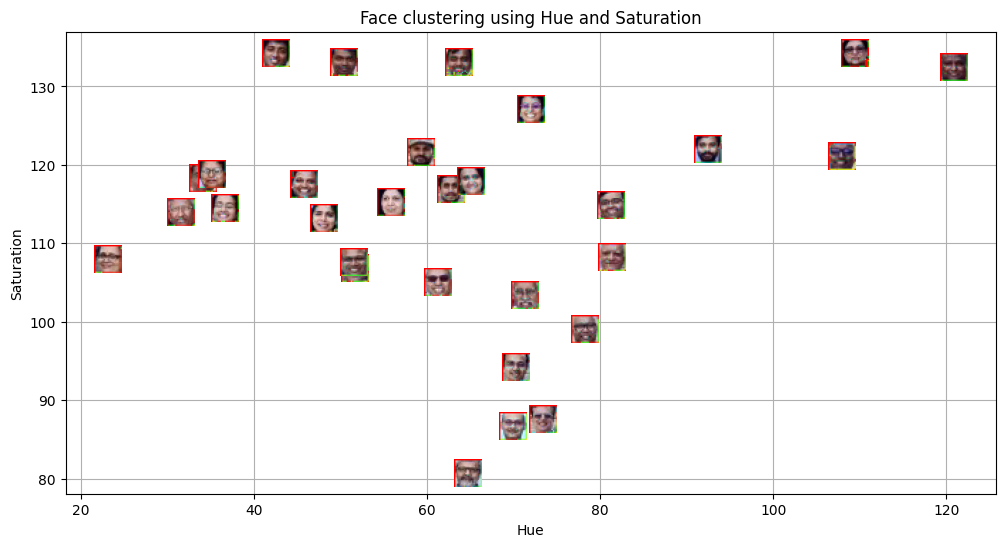

In [19]:
# Convert the image from BGR to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Lists to store features and face images
hue_saturation = []
face_images = []

# Extract face region features (Hue and Saturation)
for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]

    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])

    hue_saturation.append((hue, saturation))
    face_images.append(face)

# Convert list to numpy array
hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    resized_face = cv2.resize(face_images[i], (20, 20))
    rgb_face = cv2.cvtColor(resized_face, cv2.COLOR_HSV2RGB)

    im = OffsetImage(rgb_face)
    ab = AnnotationBbox(
        im,
        (hue_saturation[i, 0], hue_saturation[i, 1]),
        frameon=False,
        pad=0
    )

    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

# Labels and title
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face clustering using Hue and Saturation")
plt.grid(True)

# Show the plot
plt.show()


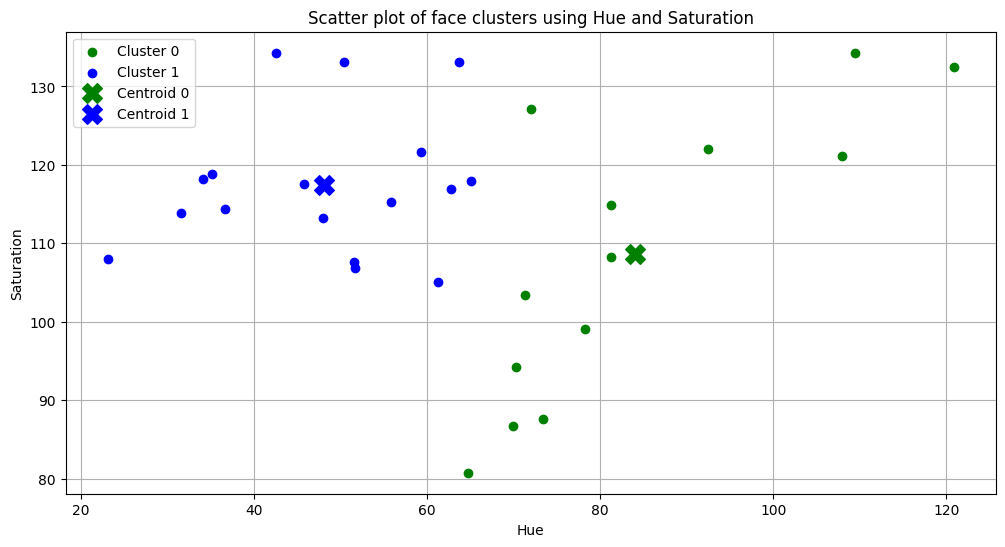

In [20]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Scatter plot setup
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to numpy arrays
cluster_0_points = np.array(cluster_0_points)

# Plot points for cluster 0 in green
plt.scatter(
    cluster_0_points[:, 0],
    cluster_0_points[:, 1],
    c="green",
    label="Cluster 0"
)

cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 1 in blue
plt.scatter(
    cluster_1_points[:, 0],
    cluster_1_points[:, 1],
    c="blue",
    label="Cluster 1"
)

# Calculate centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot centroids
plt.scatter(
    centroid_0[0],
    centroid_0[1],
    marker="X",
    s=200,
    c="green",
    label="Centroid 0"
)

plt.scatter(
    centroid_1[0],
    centroid_1[1],
    marker="X",
    s=200,
    c="blue",
    label="Centroid 1"
)

# Labels, title, legend, grid
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Scatter plot of face clusters using Hue and Saturation")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [21]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Template image face detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


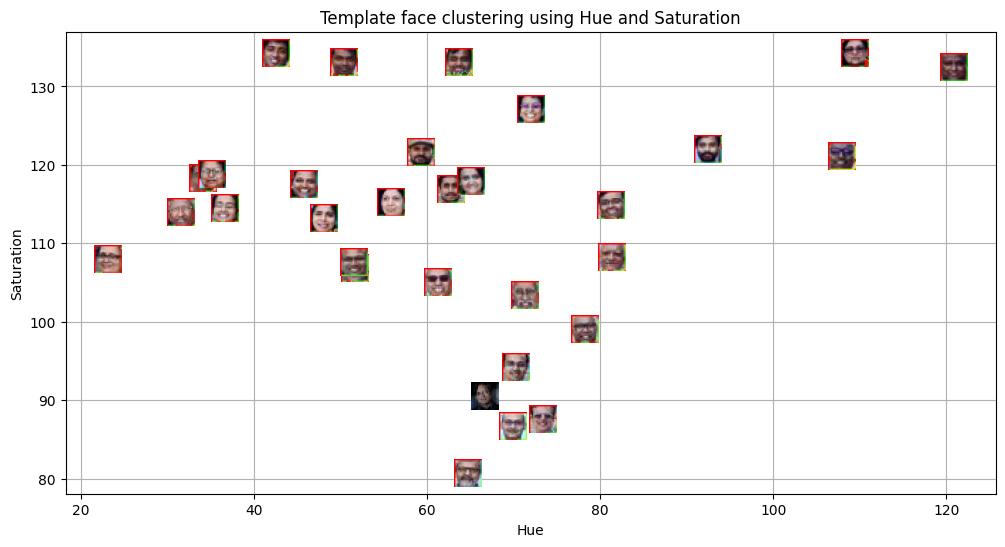

In [22]:
# Convert the template image to HSV color space
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Prepare data for prediction
template_features = []
template_features.append((template_hue, template_saturation))
template_features = np.array(template_features)

# Predict the cluster label for the template image
template_label = kmeans.predict(template_features)
template_label = template_label[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        color = 'red'
    else:
        color = 'blue'

    resized_face = cv2.resize(face_images[i], (20, 20))
    rgb_face = cv2.cvtColor(resized_face, cv2.COLOR_HSV2RGB)

    im = OffsetImage(rgb_face)
    ab = AnnotationBbox(
        im,
        (hue_saturation[i, 0], hue_saturation[i, 1]),
        frameon=False,
        pad=0
    )
    ax.add_artist(ab)

    plt.plot(
        hue_saturation[i, 0],
        hue_saturation[i, 1],
        'o',
        markersize=5,
        color=color
    )

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

resized_template = cv2.resize(template_img, (20, 20))
rgb_template = cv2.cvtColor(resized_template, cv2.COLOR_BGR2RGB)

im = OffsetImage(rgb_template)
ab = AnnotationBbox(
    im,
    (template_hue, template_saturation),
    frameon=False,
    pad=0
)
ax.add_artist(ab)

# Labels and title
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template face clustering using Hue and Saturation")
plt.grid(True)

# Show plot
plt.show()


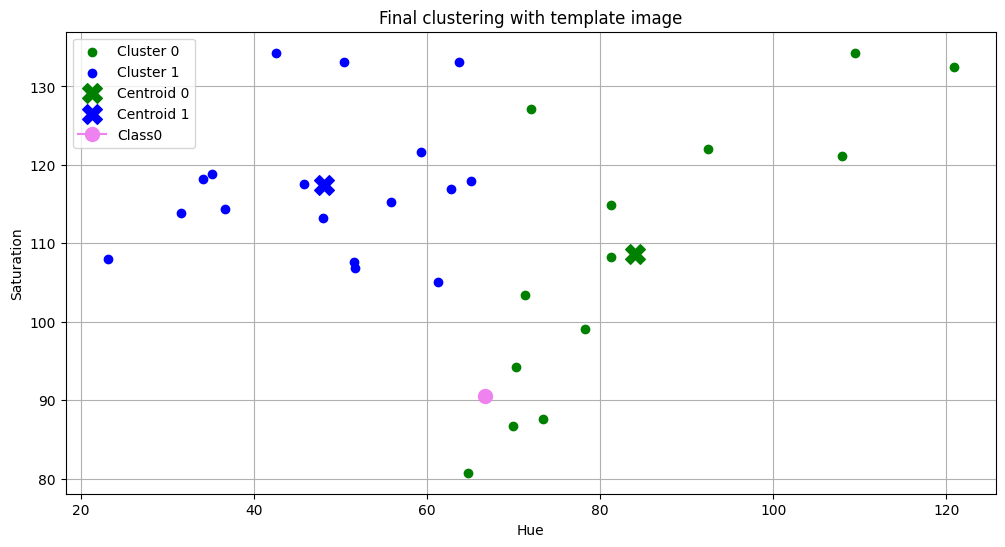

In [23]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Scatter plot setup
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(
    cluster_0_points[:, 0],
    cluster_0_points[:, 1],
    c="green",
    label="Cluster 0"
)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(
    cluster_1_points[:, 0],
    cluster_1_points[:, 1],
    c="blue",
    label="Cluster 1"
)

# Calculate centroids for both clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot centroids
plt.scatter(
    centroid_0[0],
    centroid_0[1],
    marker="X",
    s=200,
    c="green",
    label="Centroid 0"
)

plt.scatter(
    centroid_1[0],
    centroid_1[1],
    marker="X",
    s=200,
    c="blue",
    label="Centroid 1"
)

# Plot template point
plt.plot(
    template_hue,
    template_saturation,
    marker="o",
    c="violet",
    markersize=10,
    label=f"Class{template_label}"
)

# Labels, legend, grid
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Final clustering with template image")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Report:


1. What are the common distance metrics used in distance-based classification algorithms?

The commonly used distance metrics are Euclidean distance, Manhattan distance, Mahalanobis distance, Minkowski distance, Cosine distance, Hamming distance, and Chebyshev distance. These distance metrics help measure how similar or different two data points are.

2. What are some real-world applications of distance-based classification algorithms?

Distance-based classification algorithms are used in face recognition, image classification, spam detection, document classification, fraud detection, disease diagnosis, recommendation systems, and speech recognition. In these applications, new data is classified by comparing it with known data using distance.

3. Explain various distance metrics.

Euclidean distance measures the straight-line distance between two points and is widely used. Manhattan distance measures distance along horizontal and vertical paths and works well in high-dimensional data. Mahalanobis distance measures how far a point is from a data distribution by considering variance. Cosine distance measures the angle between two vectors and is useful when direction matters more than magnitude. Hamming distance counts the number of different positions between two strings or bit sequences.

4. What is the role of cross validation in model performance?

Cross validation is used to check how well a model performs on unseen data. It helps reduce overfitting and gives a more reliable estimate of model accuracy by training and testing the model on different parts of the dataset.

5. Explain variance and bias in terms of KNN.

In KNN, using a small value of K results in low bias but high variance because the model becomes sensitive to noise. Using a large value of K results in high bias but low variance because the model becomes too simple. Therefore, choosing a proper value of K is important to balance bias and variance.